# Stores - CLT, CI

# 1.0 Business Problem

Stores  Management team wants to   
-  analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.    
-  understand if spending habits differ between male and female customers: Do women spend more on Black Friday than men?   
(Assume 50 million customers are male and 50 million are female).

## 1.1 Data Problem
- Explore Customer data and understand factors influencing customer purchase
- Analyse spending habits of males,females and Identity who makes more purchases

## 1.2 Metrics
% increase in sales of product after using recommendation     
% increase in purchase amount


## 1.2 Constraints for CLT
- The variables are independent and identically distributed(IID).
- Var(X) is finite   
- Sampling is done with replacement.
- Sampling is   random.  
- sample size is less than 10% of population



## 1.4  load data

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/case

/content/drive/My Drive/case


In [ ]:
df = pd.read_csv('stores.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 1.5 Check Cardinality & convert columns

In [ ]:
#check carinality of columns
print ('Product_Category:',df['Product_Category'].nunique())
print ('Marital_Status:',df['Marital_Status'].nunique())
print ('Occupation:',df['Occupation'].nunique())
print ('Product_ID:',df['Product_ID'].nunique())
print ('User_ID:',df['User_ID'].nunique())

Product_Category: 20
Marital_Status: 2
Occupation: 21
Product_ID: 3631
User_ID: 5891


- User_ID,Product_ID  are high cardinality
- other columns are of low cardinality and can be converted into category type.
- User_ID identifies customers ,so it can be converted to string
- Product_ID  can be converted to string

In [ ]:
# convert object columns to category
df['Gender'] = df['Gender'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

#convert numeric columns
df['User_ID'] = df['User_ID'].astype('string')
df['Product_ID'] = df['Product_ID'].astype('string')
df['Product_Category'] = df['Product_Category'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')

## 1.6 data observations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  string  
 1   Product_ID                  550068 non-null  string  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(1), string(2)
memory usage: 16.3 MB


From the above data we observe
- dataset has 550068 records.
- there are no nulls in dataset   

Dataset has 10 columns  
1. 1 numeric columns .
2. 7 category type.
3. User_ID,Product_ID is string type

In [ ]:
df.describe().round(2)

,Purchase
count,550068.00
mean,9263.97
std,5023.07
min,12.00
25%,5823.00
50%,8047.00
75%,12054.00
max,23961.00


There is difference between mean and median for purchase,indicating presence of outliers

In [ ]:
df.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,4,B,1,0,5
freq,414259,219587,72308,231173,193821,324731,150933


Column |Most Frequent  | Count|   
-------|-------------- | ------------|   
Gender | M             | 414259	           |  
Age | 26-35            | 219587          |   
Occupation |4             | 72308	           |  
City_Category | B            | 231173          |   
Stay_In_Current_City_Years |1             | 193821	           |  
Marital_Status | 0            | 324731          |   
Product_Category | 5            | 150933          |   

In [ ]:
df.describe(include='string')

,User_ID,Product_ID
count,550068,550068
unique,5891,3631
top,1001680,P00265242
freq,1026,1880


Column |Most Frequent  |   Count|   
-------|-------------- | ------------|   
User_ID | 1001680             | 1026	           |  
Product_ID | P00265242            | 1880          |   

### 1.7 Non-Graphical Analysis

In [ ]:
#check cardinality
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
#check cardinality
df['Gender'].value_counts(normalize=True).round(4)*100

,proportion
Gender,
M,75.31
F,24.69


-75% customers are Male   
-25%  customers are female

In [ ]:
#check cardinality
df['Age'].value_counts(normalize=True).round(4)*100

,proportion
Age,
26-35,39.92
36-45,20.00
18-25,18.12
46-50,8.31
51-55,7.00
55+,3.91
0-17,2.75


Top 3 age groups are

|age group  | Share(%)|  
|--------- |-------|
 |26-35  | 40%|
 |36-45  | 20% |
 |18-25 | 18% |

In [ ]:
#check cardinality
df['Occupation'].value_counts(normalize=True).round(4)*100

,proportion
Occupation,
4,13.15
0,12.66
7,10.75
1,8.62
17,7.28
20,6.10
12,5.67
14,4.96
2,4.83


Top 3 Occupations are   

|Occupation  | Share(%)|  
|--------- |-------|
 |4  | 13%|
 |0  |12.7% |
 |7 | 10.75% |

In [ ]:
#check cardinality
df['City_Category'].value_counts(normalize=True).round(4)*100

,proportion
City_Category,
B,42.03
C,31.12
A,26.85


- Most frequent city category= 'B'

In [ ]:
#check cardinality
df['Stay_In_Current_City_Years'].value_counts(normalize=True).round(4)*100

,proportion
Stay_In_Current_City_Years,
1,35.24
2,18.51
3,17.32
4+,15.40
0,13.53


- Most frequent city Stay_In_Current_City_Years = 1 ( 35 %)

In [ ]:
#check cardinality
df['Marital_Status'].value_counts(normalize=True).round(4)*100

,proportion
Marital_Status,
0,59.03
1,40.97


- Most frequent Marital_Status = 0 (60%)

In [ ]:
#check cardinality
df['Product_Category'].value_counts(normalize=True).round(4)*100

,proportion
Product_Category,
5,27.44
1,25.52
8,20.71
11,4.42
2,4.34
6,3.72
3,3.67
4,2.14
16,1.79


Top 3 Product_Category are   

|Product  | Share(%)|  
|--------- |-------|
 |5  | 27 %|
 |1  |25.5 % |
 |8 | 20.7 % |

In [ ]:
# No of unique users
df['User_ID'].nunique()

5891

In [ ]:
# No of unique Product
df['Product_ID'].nunique()

3631

In [ ]:
df['Purchase'].describe().round(2)

,Purchase
count,550068.00
mean,9263.97
std,5023.07
min,12.00
25%,5823.00
50%,8047.00
75%,12054.00
max,23961.00


- mean purchase amt =  9264
- median purchase amt= 8047
- purchase amt range= (12 ,23961)

### 1.8  Graphical Analysis

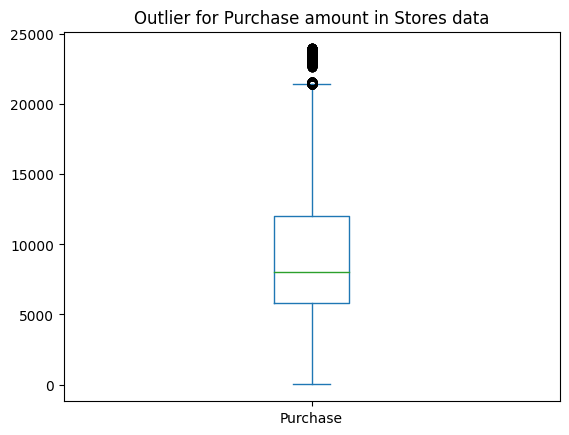

In [ ]:
df['Purchase'].plot(kind="box")
plt.title("Outlier for Purchase amount in Stores data")
plt.show()

- Graph indicates presence of outlier in purshae for amounts > 20000

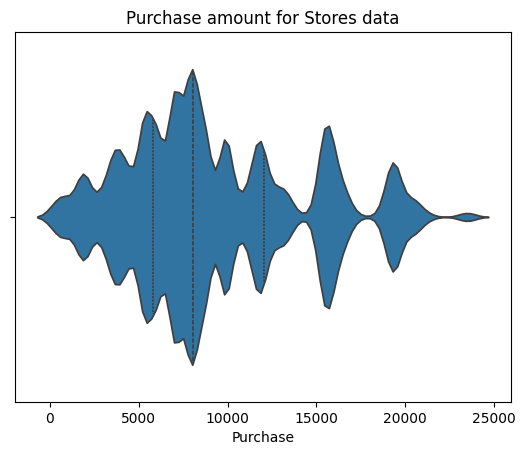

In [ ]:
sns.violinplot(data=df,x="Purchase", inner="quartile")
plt.title("Purchase amount for Stores data")
plt.show()

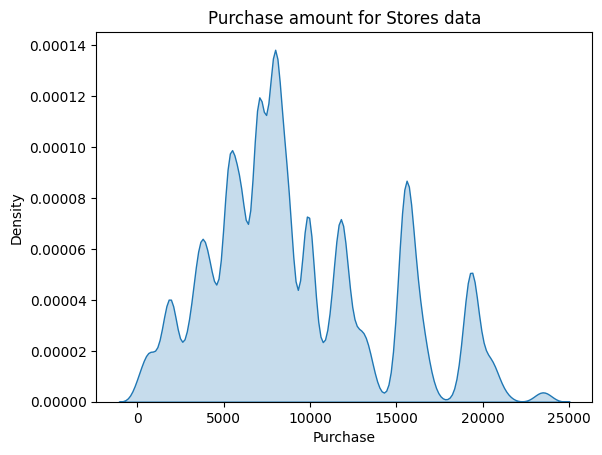

In [ ]:
sns.kdeplot(data=df,x="Purchase", fill=True)
plt.title("Purchase amount for Stores data")
plt.show()

In [ ]:
#https://datagy.io/pandas-quantile/
#calculate percentile values
df["Purchase"].quantile(q=[0.993,0.995,0.997])

,Purchase
0.993,20940.0
0.995,21352.0
0.997,23291.0


- Above graphs gives clear distribution of purchase amount   
- 99.5 precentile of purchase amount is 21352

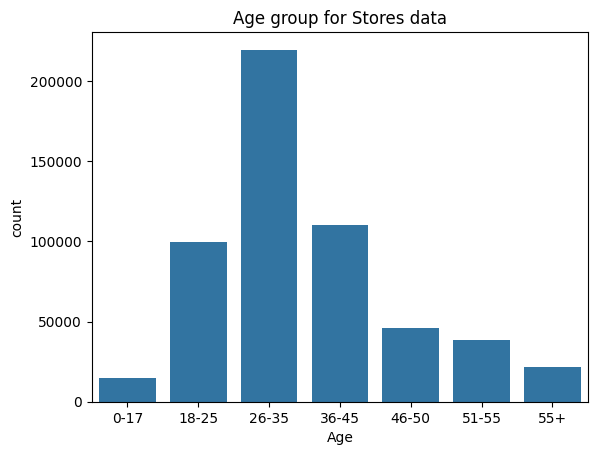

In [ ]:
sns.countplot(data=df,x='Age')
plt.title("Age group for Stores data")
plt.show()

- Most frequent age group is 18-25

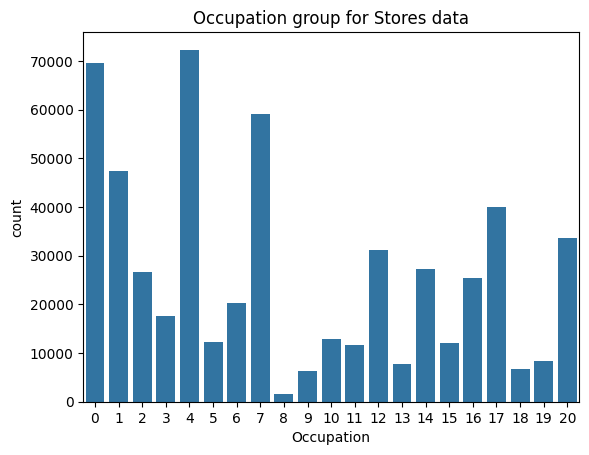

In [ ]:
sns.countplot(data=df,x='Occupation')
plt.title("Occupation group for Stores data")
plt.show()

- Most frequent Occupation=4

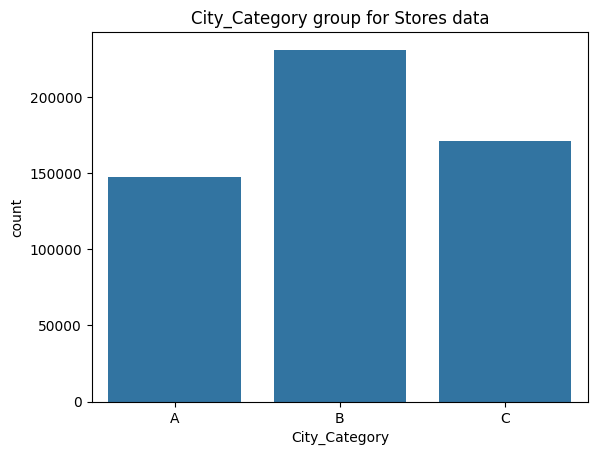

In [ ]:
sns.countplot(data=df,x='City_Category')
plt.title("City_Category group for Stores data")
plt.show()

- Most frequent City_Category=B

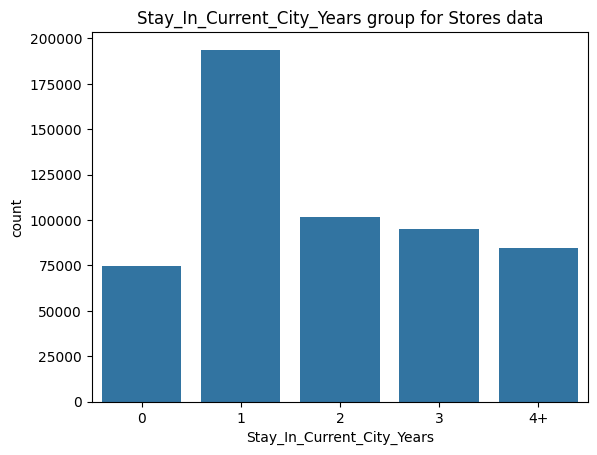

In [ ]:
sns.countplot(data=df,x='Stay_In_Current_City_Years')
plt.title("Stay_In_Current_City_Years group for Stores data")
plt.show()

- Most frequent Stay_In_Current_City_Years=1

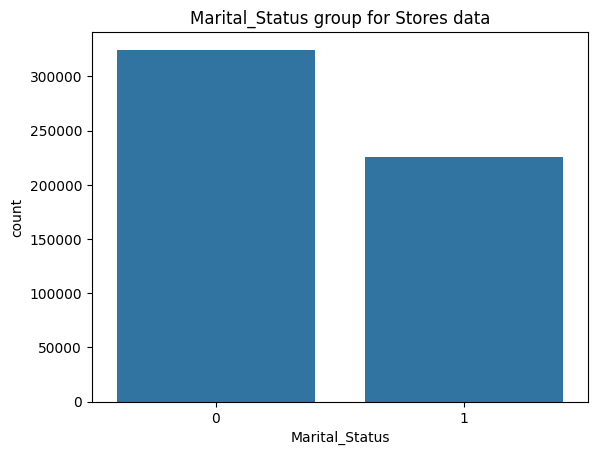

In [ ]:
sns.countplot(data=df,x='Marital_Status')
plt.title("Marital_Status group for Stores data")
plt.show()

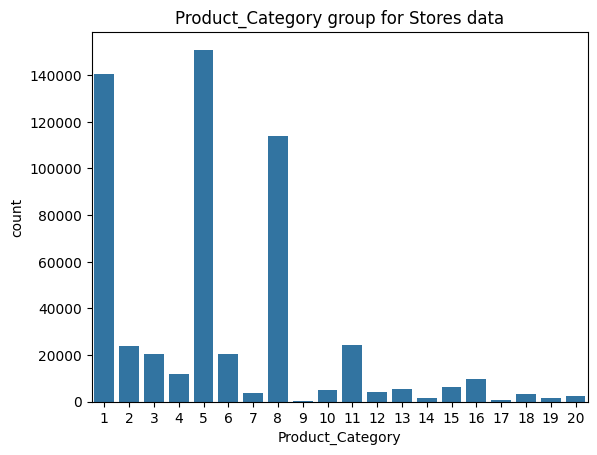

In [ ]:
sns.countplot(data=df,x='Product_Category')
plt.title("Product_Category group for Stores data")
plt.show()

- Most frequent Product_Category=5

###  1.9 Bivariate analysis
####  1.9.1 Age vs Gender analysis

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(index=df['Age'], columns=df['Gender'],
    normalize='columns').round(2)*100

Gender,F,M
Age,,
0-17,4.0,2.0
18-25,18.0,18.0
26-35,37.0,41.0
36-45,20.0,20.0
46-50,10.0,8.0
51-55,7.0,7.0
55+,4.0,4.0


- Highest Age Group is 26-35 years

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(index=df['Age'], columns=df['Gender'],
    normalize='index').round(2)*100

Gender,F,M
Age,,
0-17,34.0,66.0
18-25,25.0,75.0
26-35,23.0,77.0
36-45,25.0,75.0
46-50,29.0,71.0
51-55,26.0,74.0
55+,24.0,76.0


- In all age groups Males purchase more

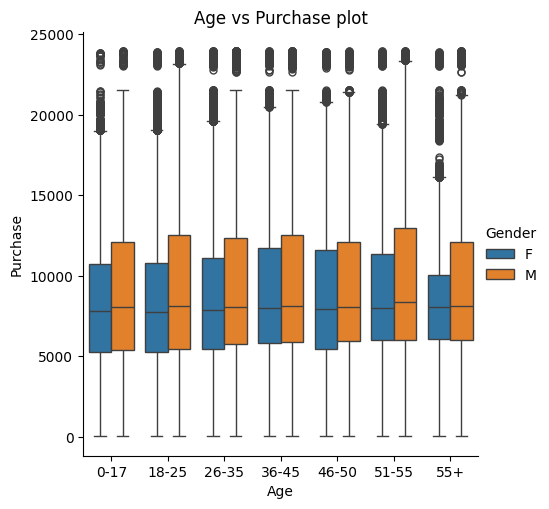

In [ ]:
sns.catplot(x='Age',y='Purchase',hue='Gender',data=df,kind='box',)
plt.title("Age vs Purchase plot")
plt.show()

- From graph we see that median purchase amount is same across age groups and gender

####  1.9.2 City_Category vs Gender analysis

In [ ]:
pd.crosstab(index=df['City_Category'], columns=df['Gender'],
    normalize='columns').round(2)*100

Gender,F,M
City_Category,,
A,26.0,27.0
B,43.0,42.0
C,31.0,31.0


- City_Category='B' is most popular for both gender

In [ ]:
pd.crosstab(index=df['City_Category'], columns=df['Gender'],
    normalize='index').round(2)*100

Gender,F,M
City_Category,,
A,24.0,76.0
B,25.0,75.0
C,25.0,75.0


- In all City_Category males are more

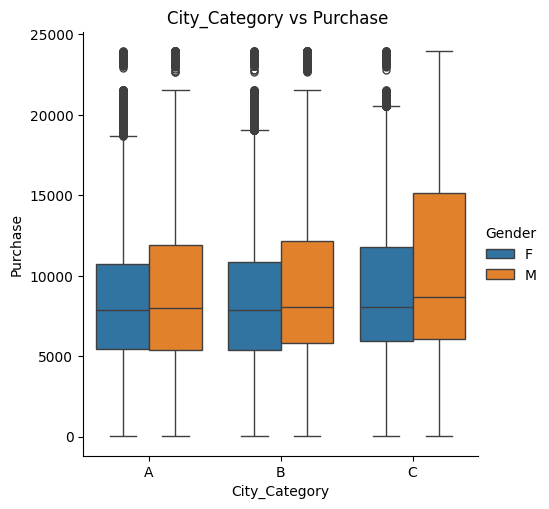

In [ ]:
sns.catplot(x='City_Category',y='Purchase',hue='Gender',data=df,kind='box',)
plt.title("City_Category vs Purchase ")
plt.show()

- In all City_Category median purchase values are roughly same   
- Outliers are more for females. So females with high income in city are more likely to purchase

####  1.9.3 Stay_In_Current_City_Years vs Gender analysis

In [ ]:
pd.crosstab(index=df['Stay_In_Current_City_Years'], columns=df['Gender'],
    normalize='columns').round(2)*100

Gender,F,M
Stay_In_Current_City_Years,,
0,13.0,14.0
1,38.0,34.0
2,18.0,19.0
3,18.0,17.0
4+,14.0,16.0


- Stay_In_Current_City_Years= 1' is most frequent for both gender

In [ ]:
pd.crosstab(index=df['Stay_In_Current_City_Years'], columns=df['Gender'],
    normalize='index').round(2)*100

Gender,F,M
Stay_In_Current_City_Years,,
0,23.0,77.0
1,26.0,74.0
2,24.0,76.0
3,26.0,74.0
4+,22.0,78.0


- In all Stay_In_Current_City_Years males are more

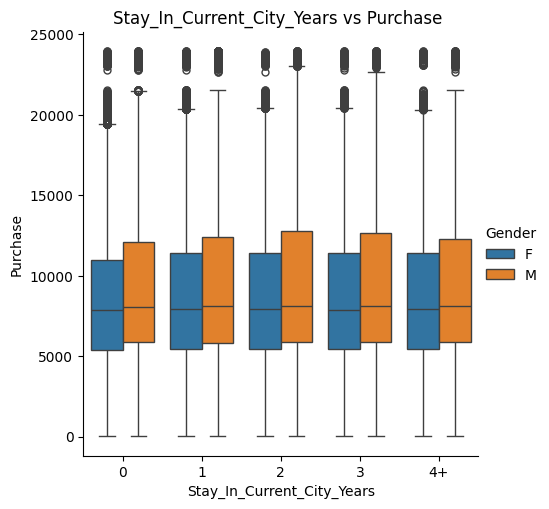

In [ ]:
sns.catplot(x='Stay_In_Current_City_Years',y='Purchase',hue='Gender',data=df,kind='box',)
plt.title("Stay_In_Current_City_Years vs Purchase ")
plt.show()

- In all Stay_In_Current_City_Years median purchase values are roughly same

####  1.9.4   Marital_Status vs Gender analysis

In [ ]:
pd.crosstab(index=df['Marital_Status'], columns=df['Gender'],
    normalize='columns').round(2)*100

Gender,F,M
Marital_Status,,
0,58.0,59.0
1,42.0,41.0


- Marital_Status= 0 is most frequent for both gender

In [ ]:
pd.crosstab(index=df['Marital_Status'], columns=df['Gender'],
    normalize='index').round(2)*100

Gender,F,M
Marital_Status,,
0,24.0,76.0
1,25.0,75.0


- In all Marital_Status males are more

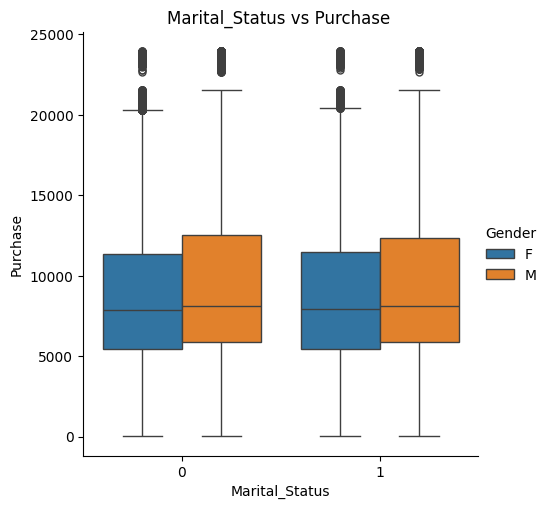

In [ ]:
sns.catplot(x='Marital_Status',y='Purchase',hue='Gender',data=df,kind='box',)
plt.title("Marital_Status vs Purchase ")
plt.show()

- In all Marital_Status median purchase values are roughly same

####  1.9.4    Product_Category vs Gender analysis

In [ ]:
pd.crosstab(index=df['Product_Category'], columns=df['Gender'],
    normalize='columns').round(2)*100

Gender,F,M
Product_Category,,
1,18.0,28.0
2,4.0,4.0
3,4.0,3.0
4,3.0,2.0
5,31.0,26.0
6,3.0,4.0
7,1.0,1.0
8,25.0,19.0
9,0.0,0.0


- Product_Category= 5 is most frequent for females
- Product_Category= 1 is most frequent for males

In [ ]:
pd.crosstab(index=df['Product_Category'], columns=df['Gender'],
    normalize='index').round(2)*100

Gender,F,M
Product_Category,,
1,18.0,82.0
2,24.0,76.0
3,30.0,70.0
4,31.0,69.0
5,28.0,72.0
6,22.0,78.0
7,25.0,75.0
8,29.0,71.0
9,17.0,83.0


- In all Product_Category males are more

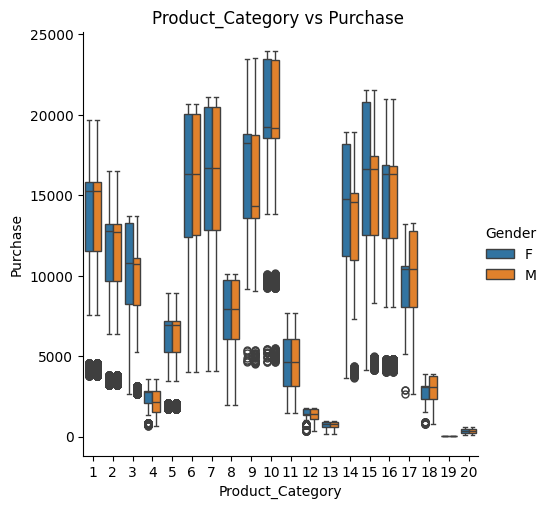

In [ ]:
sns.catplot(x='Product_Category',y='Purchase',hue='Gender',data=df,kind='box',)
plt.title("Product_Category vs Purchase ")
plt.show()

- In Product_Category=9, median purchase values are different for males,females. It is prefered by higher income males   
- median purchase is different for different Product_Category

####  1.9.5    Occupation vs Gender analysis

In [ ]:
pd.crosstab(index=df['Occupation'], columns=df['Gender'],
    normalize='columns').round(2)*100

Gender,F,M
Occupation,,
0,13.0,12.0
1,13.0,7.0
2,6.0,4.0
3,6.0,2.0
4,13.0,13.0
5,2.0,2.0
6,6.0,3.0
7,7.0,12.0
8,0.0,0.0


- Occupation = 0,1,4 is most frequent for females
- Occupation = 0,4,7 is most frequent for males

In [ ]:
pd.crosstab(index=df['Occupation'], columns=df['Gender'],
    normalize='index').round(2)*100

Gender,F,M
Occupation,,
0,26.0,74.0
1,38.0,62.0
2,32.0,68.0
3,45.0,55.0
4,25.0,75.0
5,18.0,82.0
6,40.0,60.0
7,17.0,83.0
8,23.0,77.0


- females are more in Occupation 9

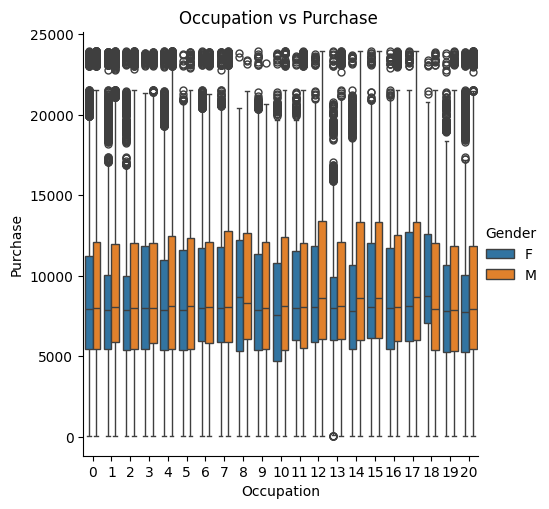

In [ ]:
sns.catplot(x='Occupation',y='Purchase',hue='Gender',data=df,kind='box',)
plt.title("Occupation vs Purchase ")
plt.show()

- Outliers are more for females  
- Median purchase amount is same for different occupations

### 1.10 Correlation Analysis

In [ ]:
df1 =df.copy()

In [ ]:
#https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe
cat_cols = df1.select_dtypes(['category']).columns
df1[cat_cols] = df1[cat_cols].apply(lambda x: x.cat.codes)

In [ ]:
#https://stackoverflow.com/questions/50490540/replace-a-character-in-a-python-dataframe-column
df1['Product_ID'] = df1['Product_ID'].str.replace("P",'')
df1['Product_ID'] = df1['Product_ID'].astype('int64')

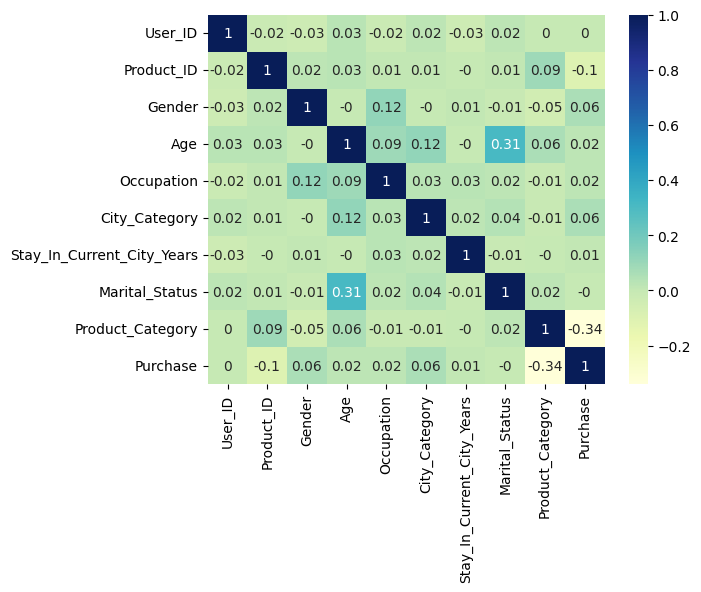

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr().round(2), cmap="YlGnBu", annot=True)

Correlation plot shows:
 - weak correlation of  0.31 between Age,Marital_Status
 - weak correlation of -0.34 between Product_Category,Purchase

These weak correlation values can be ignored

# 2. Missing Value & Outlier Detection

## 2.1 Missing values

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


- There are no missing values in dataset

## 2.2 Outlier Detection

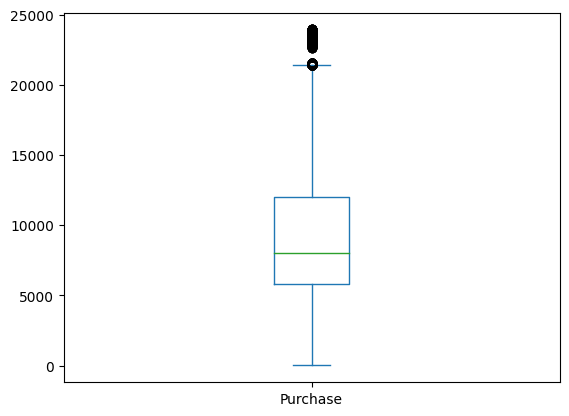

In [ ]:
df['Purchase'].plot(kind="box")
plt.show()

In [ ]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
#https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('iqr',iqr)
low = q1-1.5*iqr
high= q3+1.5*iqr
print('low',low)
print('high',high)
df_filtered =df[~((df["Purchase"] < low) | (df["Purchase"] > high))]

q1 5823.0
q3 12054.0
iqr 6231.0
low -3523.5
high 21400.5


In [ ]:
# No. of outliers removed from dataset
print( 'No. of outlier :', (df.shape[0]-df_filtered.shape[0] ))
print( ' % of outlier  :', (100-(df_filtered.shape[0]/df.shape[0])*100 ))

No. of outlier : 2677
 % of outlier  : 0.4866671029763552


# 3. Business Insights


The most frequent column values are:   


Column |Most Frequent  |  
-------|-------------- |
Gender | M             |  
Age | 26-35            |  
Occupation |4          |  
City_Category | B      |  
Stay_In_Current_City_Years |1             |  
Marital_Status | 0         |
Product_Category | 5       |  
User_ID | 1001680             |  
Product_ID | P00265242            |  


**Observations:**
From the above we observe:   
- 75% customers are Male
- Most frequent age group is 26-35 years having 40% share
- Top Occupation=4 having 13% share
- Top City_Category=B with  42% share
- 35% customer stay in current city for 1 year. This is the highest category
- 60% customers have Marital_Status = 0
- Top Product_Category=5 having 27% share

**Unique values**
- No. of unique users is 5891
- No. of unique Product is 3631  

**Purchase**  
- median purchase amount is 8047     
- Purchase amount range is 12 to 23961     
- This attribute has  0.5%  outliers (extreme values)  
- median purchase amount is same across age groups and gender   
- females with high income in city are more likely to purchase    


**Product_Category**    
- top Product_Category= 5  for females
- top Product_Category= 1  for males
- Product_Category=9 is prefered by higher income males
- median purchase is different for different Product_Category

**Occupation**   
- Occupation = 0,1,4 is most frequent for females   
- Occupation = 0,4,7 is most frequent for males    
- females are more in Occupation 9     
- there are more high value(outlier) purchases by females

     



# 4. Answering questions


##  CLT

In [ ]:
import numpy as np
from scipy.stats import norm
from tqdm import tqdm

In [ ]:
def get_sampl_lst(smpl_size,smpl_cnt,in_data):
    means = []
    for i in tqdm(range(smpl_cnt)):
        sample = in_data['Purchase'].sample(smpl_size)
        means.append(round(sample.mean(),2))

    return means

In [ ]:
#split data by "Gender" into Males,Females
df_male = df[df['Gender'] == 'M']
df_fem  = df[df['Gender'] == 'F']

In [ ]:
ml_mean_10 =get_sampl_lst(10,500,df_male)

100%|██████████| 500/500 [00:07<00:00, 63.03it/s]


In [ ]:
ml_mean_50 =get_sampl_lst(50,500,df_male)

100%|██████████| 500/500 [00:05<00:00, 84.64it/s]


In [ ]:
ml_mean_100 =get_sampl_lst(100,500,df_male)

100%|██████████| 500/500 [00:07<00:00, 65.61it/s]


In [ ]:
ml_mean_200 =get_sampl_lst(200,500,df_male)

100%|██████████| 500/500 [00:06<00:00, 77.93it/s]


In [ ]:
mean_df = pd.DataFrame(
              {'n10': ml_mean_10 ,
               'n50': ml_mean_50 ,
               'n100': ml_mean_100 ,
               'n200': ml_mean_200 })

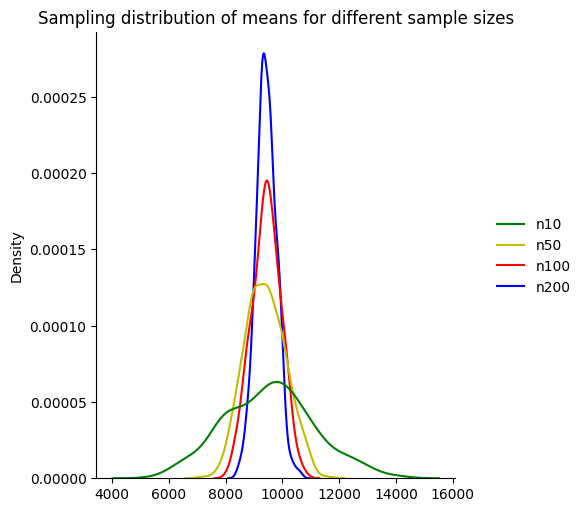

In [ ]:
sns.displot(mean_df,kind='kde', palette=[ 'g','y','r','b'])
plt.title('Sampling distribution of means for different sample sizes')
plt.show()

From above distribution of sample means we see that as sample size increases ,variance of sample mean decreases.   So as sample size increases the precision of estimate increases.



##  CI for Males,Females

In [ ]:
def compute_ci(data,col,v):
    '''
    compute purchase CI for col
    '''
    rnd = lambda x:round(x,2)  # round to 2 decimals
    df = data[data[col]==v]
    n=len(df)
    mu =  df['Purchase'].mean()   #sample mean
    sg =  df['Purchase'].std()    #sample std dev
    mu=rnd(mu)
    sg=rnd(sg)
    print( 'sample mean:',mu)
    print( 'sample std dev:',sg)

    z=1.645    # z-score for 90% CI
    err =  (z*sg)/np.sqrt(n)
    ci_range =[ rnd(mu-err),rnd(mu+err)]
    print(f'90% CI for {col} {v}={ci_range}')

    z=1.965     # z-score for 95% CI
    err =  (z*sg)/np.sqrt(n)
    ci_range =[ rnd(mu-err),rnd(mu+err)]
    print(f'95% CI for {col} {v}={ci_range}')

    z=2.576     # z-score for 99% CI
    err =  (z*sg)/np.sqrt(n)
    ci_range =[ rnd(mu-err),rnd(mu+err)]
    print(f'99% CI for {col} {v}={ci_range}')
    print('-'*40)


In [ ]:
vals=df['Gender'].unique().to_list()

for v in vals:
    compute_ci(df,'Gender',v)

sample mean: 8734.57
sample std dev: 4767.23
90% CI for Gender F=[8713.29, 8755.85]
95% CI for Gender F=[8709.15, 8759.99]
99% CI for Gender F=[8701.25, 8767.89]
----------------------------------------
sample mean: 9437.53
sample std dev: 5092.19
90% CI for Gender M=[9424.52, 9450.54]
95% CI for Gender M=[9421.98, 9453.08]
99% CI for Gender M=[9417.15, 9457.91]
----------------------------------------


<ipython-input-80-d092477c89bb>:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  vals=df['Gender'].unique().to_list()


**Observations on CI**
- As CI% (z-score) increases ,CI interval inceases, so precision decreases  
- Narrower CI values give more accurate estimate   

**Purchase CI for gender**
- There is no overlap of purchase CI for males and females.So buying patterns is different. This could be due to occupational, product   and demographic difference
- CI range for males is higher than females. This can be used for setting prices for the segments
- CI range is good indicator of population parameter. So products for a segment should be within this range
- Products with prices in CI range for males can be targeted for males,similarly with females    
- CI range for females is less than males,so more accurate



## 4.2 CI for  Married,Unmarried

In [ ]:
vals=df['Marital_Status'].unique().to_list()

for v in vals:
    compute_ci(df,'Marital_Status',v)

sample mean: 9265.91
sample std dev: 5027.35
90% CI for Marital_Status 0=[9251.4, 9280.42]
95% CI for Marital_Status 0=[9248.57, 9283.25]
99% CI for Marital_Status 0=[9243.18, 9288.64]
----------------------------------------
sample mean: 9261.17
sample std dev: 5016.9
90% CI for Marital_Status 1=[9243.78, 9278.56]
95% CI for Marital_Status 1=[9240.4, 9281.94]
99% CI for Marital_Status 1=[9233.95, 9288.39]
----------------------------------------


<ipython-input-81-69e576578149>:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  vals=df['Marital_Status'].unique().to_list()


- There is overlap in CI for Marital Status 0,1 .So buying pattern is similar   
- CI range does not change much for Marital Status


## 4.2 CI for  Age groups

In [ ]:
vals=df['Age'].unique().to_list()

for v in vals:
    compute_ci(df,'Age',v)

<ipython-input-82-e29859cfd1b5>:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  vals=df['Age'].unique().to_list()


sample mean: 8933.46
sample std dev: 5111.11
90% CI for Age 0-17=[8865.04, 9001.88]
95% CI for Age 0-17=[8851.73, 9015.19]
99% CI for Age 0-17=[8826.32, 9040.6]
----------------------------------------
sample mean: 9336.28
sample std dev: 5011.49
90% CI for Age 55+=[9280.06, 9392.5]
95% CI for Age 55+=[9269.13, 9403.43]
99% CI for Age 55+=[9248.25, 9424.31]
----------------------------------------
sample mean: 9252.69
sample std dev: 5010.53
90% CI for Age 26-35=[9235.1, 9270.28]
95% CI for Age 26-35=[9231.68, 9273.7]
99% CI for Age 26-35=[9225.15, 9280.23]
----------------------------------------
sample mean: 9208.63
sample std dev: 4967.22
90% CI for Age 46-50=[9170.41, 9246.85]
95% CI for Age 46-50=[9162.97, 9254.29]
99% CI for Age 46-50=[9148.78, 9268.48]
----------------------------------------
sample mean: 9534.81
sample std dev: 5087.37
90% CI for Age 51-55=[9492.16, 9577.46]
95% CI for Age 51-55=[9483.86, 9585.76]
99% CI for Age 51-55=[9468.02, 9601.6]
-------------------------

- CI range is good indicator of population parameter. So products for a segment should be within this range
- There is no overlap with neighbour group. So buying pattern changes with age
- Highest CI range is for Age group 36-45. So more buying power
- Lowest CI range is for Age group 0-17. So less buying power
- Till age 45 ,buying power increases with age

# 5. Final Insights

###  Gender Insight   
  **Male**  
- 75% customers are Male  
- 95% CI for Gender M=[9421.98, 9453.08]  
- Occupation = 0,4,7 is most frequent for males
- CI range for males is higher than females   

**Female**  
- 95% CI for Gender F=[8709.15, 8759.99]
- Occupation = 0,1,4 is most frequent for females
- females are more in Occupation 9   

**conclusion**  
- There is no overlap of purchase CI for males and females.So buying patterns is different. This could be due to occupational, product   and demographic difference
- CI range is good indicator of population parameter. So products for a segment should be within this range

### Marital_Status Insight
- 95% CI for Marital_Status 0=[9248.57, 9283.25]  
- 95% CI for Marital_Status 1=[9240.4, 9281.94]
- There is overlap in CI for Marital Status 0,1 .So buying pattern is similar
- This overlap can be used to advantage  to increase sales, since price range is same  
- Marital_Status=0   has highest share of 59%

### Age group Insight  
- 95% CI for Age 0-17=[8851.73, 9015.19]
- 95% CI for Age 18-25=[9138.32, 9201.0]
- 95% CI for Age 26-35=[9231.68, 9273.7]
- 95% CI for Age 36-45=[9301.59, 9361.11]
- 95% CI for Age 46-50=[9162.97, 9254.29]
- 95% CI for Age 51-55=[9483.86, 9585.76]
- 95% CI for Age 55+=[9269.13, 9403.43]
- There is no CI overlap with neighbour group. So buying pattern changes with age
- Highest CI range is for Age group 36-45. So more buying power
- Lowest CI range is for Age group 0-17. So less buying power
- Till age 45 ,buying power increases with age
- Age 26-35 has highest share of 40%     

**Product_Category**  
-  Product_Category  also influences purchase price

### Demography Insight  
 - Most customer are male   
 - They are young in age group 26-35  
 - They are mobile (Stay_In_Current_City_Years=1)
 - They are single(Marital_Status=0)  
 - They are from medium size city(City_Category=B)

# 6. Recommendations

- marketing should be targetted towards dominant demography for higher awareness
- products should be directed to dominant demography identified for higher sales
- Age has significant effect on purchase. So products appropriate to Age groups should be targetted for high impact  
- Ages 18-45 have highest market share with good buying power.So priority should be given to this Age group  
- Buying pattern of Males and Females are different.So Products should be tailored to suit these groups.
- Only 25% customers are females.This segment has scope for improvement
- Married Customers have only 41% share .This gegment has scope for improvement
- Top 3 Product_Category with highest share should be given priority for marketing and sales
- Top 3 Occupations with highest share should be given priority developing suitable products   
- Occupation 9 is more frequent for females ,this can be used to develop and market suitable products
- The highest sold product can be marketed to further increase sales

